## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('german_credit.txt')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [ ]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
data.isnull().sum()
#во всех столбцах ноль пропусков, следовательно,  пропусков нет

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

status                     порядковый

duration                   вещественный

credit_history             порядковый

purpose                    категориальный

amount                     вещественный

savings                    порядковый

employment_duration        порядковый

installment_rate           порядковый

personal_status_sex        категориальный

other_debtors              категориальный

present_residence          порядковый

property                   категориальный 

age                        вещественный

other_installment_plans    категориальный

housing                    порядковый

number_credits             порядковый

job                        порядковый

people_liable              порядковый

telephone                  бинарный

foreign_worker             бинарный

credit_risk                бинарный

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data.groupby(['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
youngsters = data[data['age'] < 30]
str(youngsters[youngsters['housing'] == 'rent'].shape[0] / youngsters.shape[0] * 100) +'%'

'66.66666666666666%'

In [ ]:
elders = data[data['age'] > 40]
str(elders[elders['housing'] == 'rent'].shape[0] / elders.shape[0] * 100) +'%'

'68.01470588235294%'

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
data[(data.foreign_worker == 'yes') & ((data.number_credits =='4-5') | (data.number_credits == '>= 6'))].shape[0]

1

### Задание 6 (1 балл)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

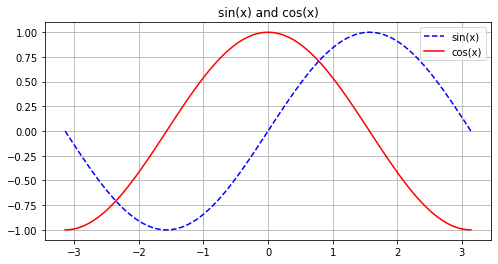

In [83]:
d = np.linspace(-np.pi, np.pi, 100, endpoint=True)
plt.plot(d, np.sin(d), color = 'blue', label='sin(x)', linestyle='--')
plt.plot(d, np.cos(d), color = 'red', label='cos(x)')
plt.legend()
plt.grid(True)
plt.title('sin(x) and cos(x)')
plt.show()

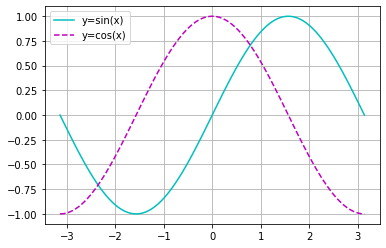

Не знаю, какой здесь нужен комментарий: sin и cos - периодические функции, что видно на графике! 

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [60]:
good = []
bad = []
names = []
for i in data['status']:
  names.append(i)
  data1 = data[data['status'] == i]
  good.append(data1[data1['credit_risk'] == 'good'].shape[0])
  bad.append(data1[data1['credit_risk'] == 'bad'].shape[0])

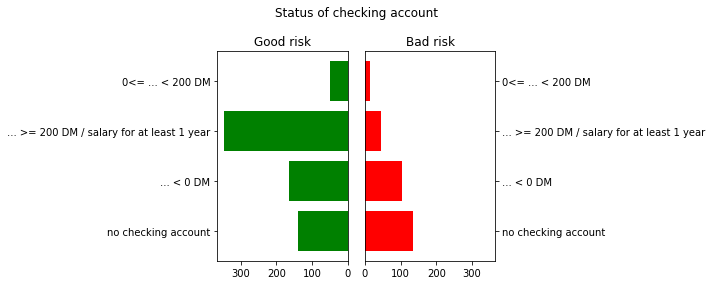

In [81]:
graph, (plot1, plot2) = plt.subplots(1, 2, figsize = (10, 4))


plot1.barh(names, good, color = 'green')
plot1.set_title('Good risk')
plot1.invert_xaxis()

plot2.barh(names, bad, color = 'red')
plot2.set_title("Bad risk")
plot2.tick_params(labelleft = False, labelright = True, left = False, right = True)
plot2.set_xlim([0, 365])



graph.suptitle('Status of checking account')
graph.tight_layout()
plt.show()

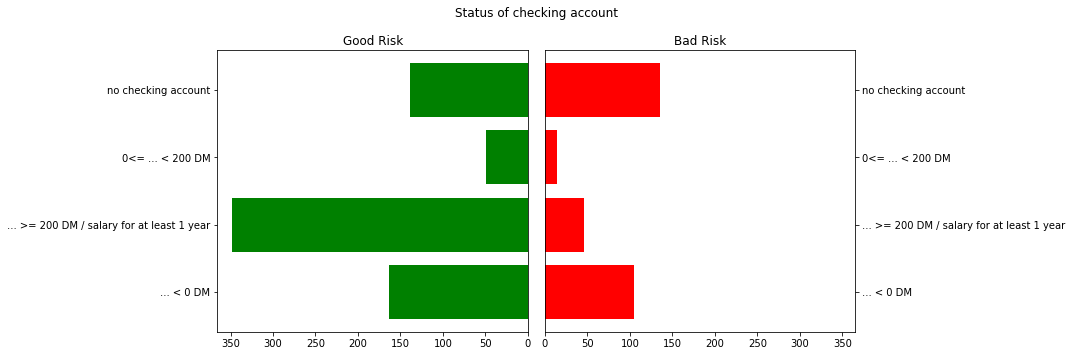

О прямой зависимости пока говорить нельзя, однако стоит обратить внимание, что больше всего положительных оценок по кредиту было у категории людей, имеющих самый большой счет. Также в этой категории относительно мало отрицательных рейтингов. Практически одинаковые рейтинги имеют люди, не имеющие счетов в банке. Также в этой категории относительно мало отрицательных рейтингов. Практически одинаковые рейтинги имеют люди, не имеющие счетов в банке.

### Задание 8  (0.5 балла)

In [4]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

[Text(0.5, 1.0, 'Good/bad cases in savings')]

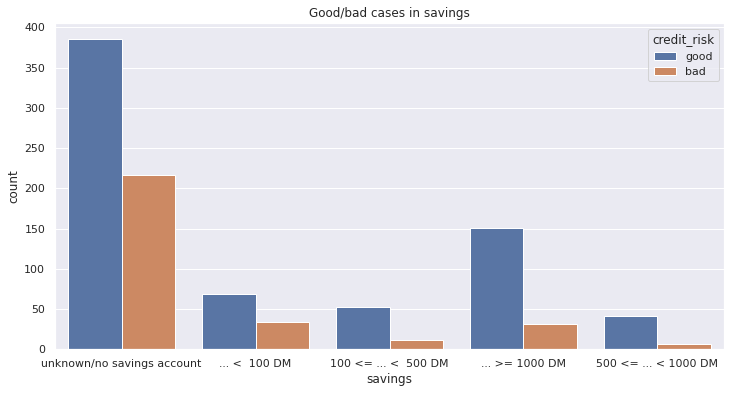

In [87]:
sns.set (rc={"figure.figsize":(12, 6)})
sns.countplot(x = 'savings', hue = 'credit_risk', data = data).set(title='Good/bad cases in savings')

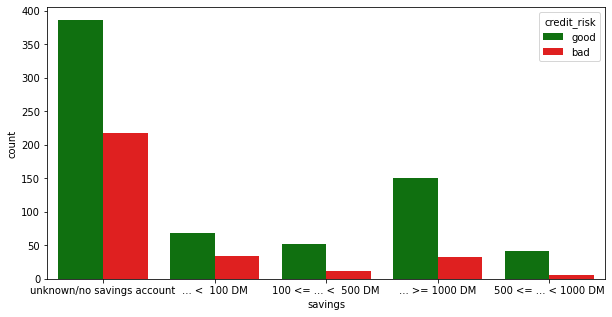

Опираясь на количество строк кода, ассистенту не сложно догадаться, что второй способ гораздо менее затратен по времени, энергии и нервов :)
Также на втором графике проще различать количественные различия (какие кейсы (негативные/позитивные) по каждой категории больше/меньше).
Больше всего людей вообще не имели сбережений.
Обратить внимание следует на категорию с ‘>= 1000 DM’, в ней отношение позитивные/негативные достигают наибольшего значения среди всех категорий

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

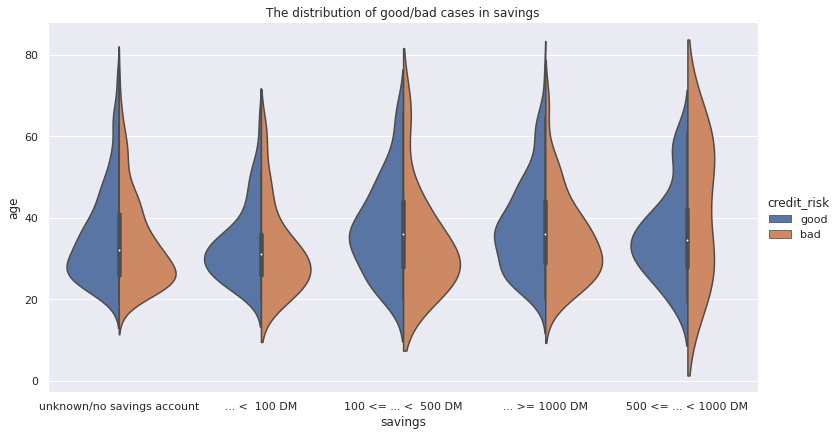

In [88]:
sns.catplot(data=data, kind="violin", x="savings", y="age", hue="credit_risk", split=True, height= 6 , aspect= 1.8).set(title='The distribution of good/bad cases in savings')

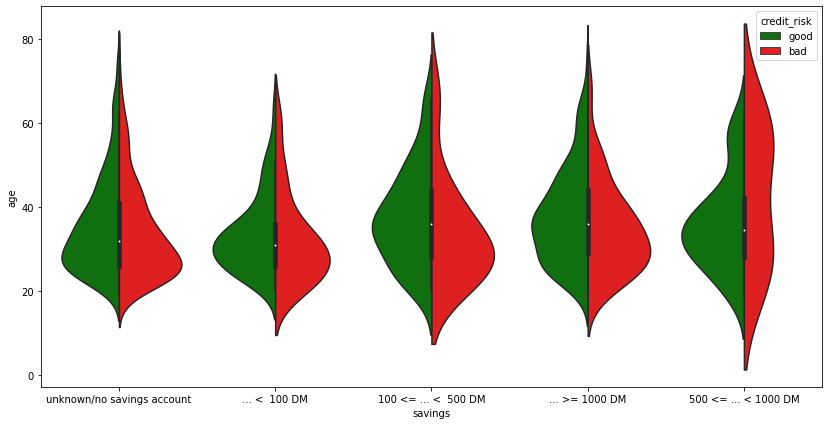

Достаточно симметричное распределение возрастов по всем категориям кроме ‘500 < … < 1000’, причем больше всего кредитов брали люди возраста 20-50 лет. Что касается отличающейся категории, отрицательные кейсы принимают более равномерный вид.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

Text(0.06, 0.5, 'Count')

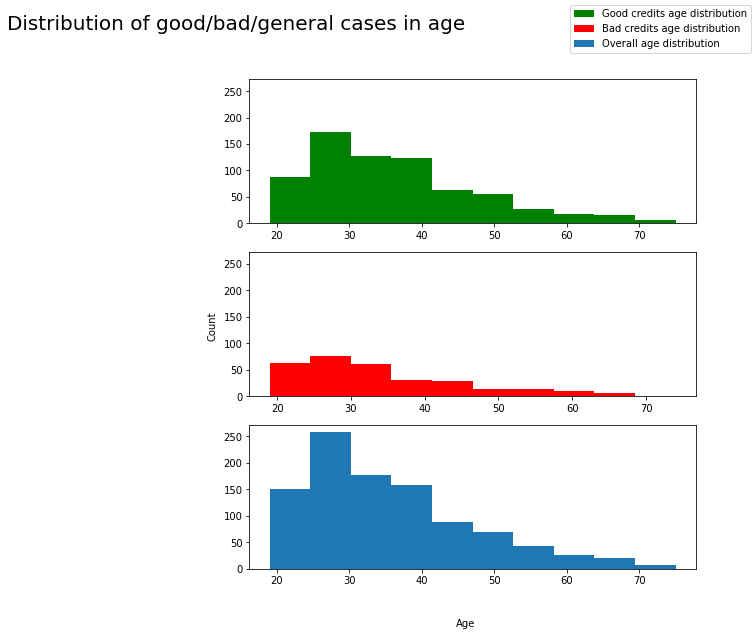

In [13]:
plt.rcParams ['figure.figsize'] = [8, 9]
fig, axes = plt.subplots(nrows = 3, ncols = 1, sharey = True)

fig.suptitle('Distribution of good/bad/general cases in age', fontsize = 20, ha='right')
axes[0].hist(data[data['credit_risk'] == 'good']['age'], color = 'green', label = 'Good credits age distribution')
axes[1].hist(data[data['credit_risk'] == 'bad']['age'], color = 'red', label = 'Bad credits age distribution')
axes[2].hist(data['age'], label = 'Overall age distribution')
fig.legend()
fig.text(0.5, 0.04, 'Age', ha='center', va='center')
fig.text(0.06, 0.5, 'Count', ha='center', va='center', rotation='vertical')

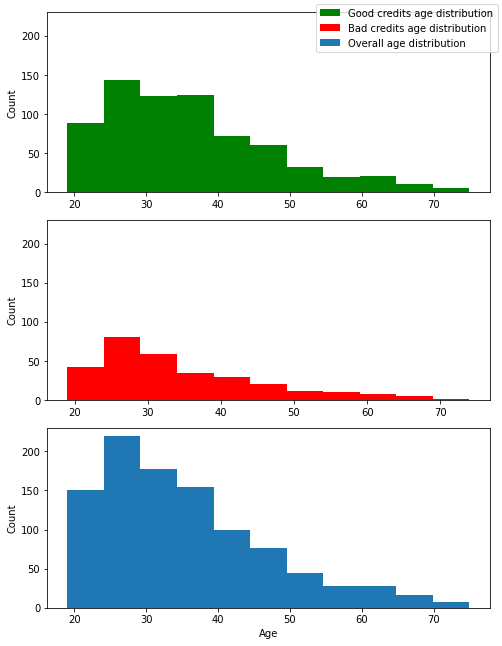

Видно что в целом положительных кейсов больше. Также как и в предыдущем графике заметная самая большая плотность среди возрастов 20-50

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0.5, 1.0, 'Scatter of the duration and credit amount')

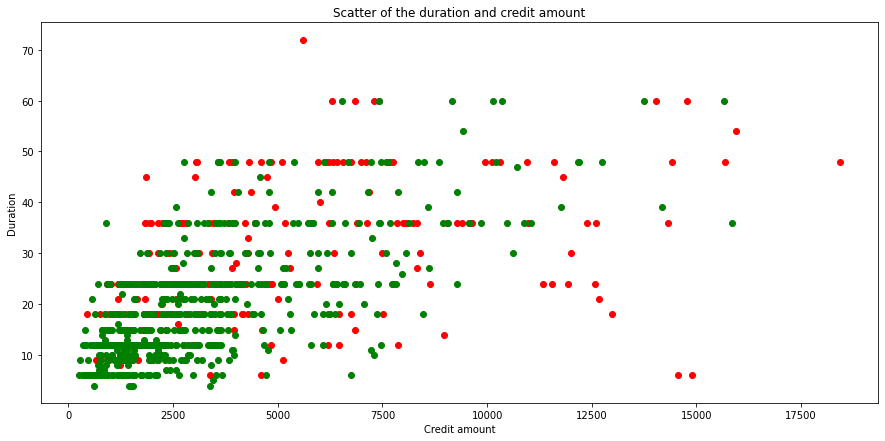

In [15]:
plt.rcParams ['figure.figsize'] = [15, 7]
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']
plt.scatter(bad["amount"], bad["duration"], c ="r")
plt.scatter(good["amount"], good["duration"], c ="g")
plt.xlabel("Credit amount")
plt.ylabel("Duration")
plt.title("Scatter of the duration and credit amount")

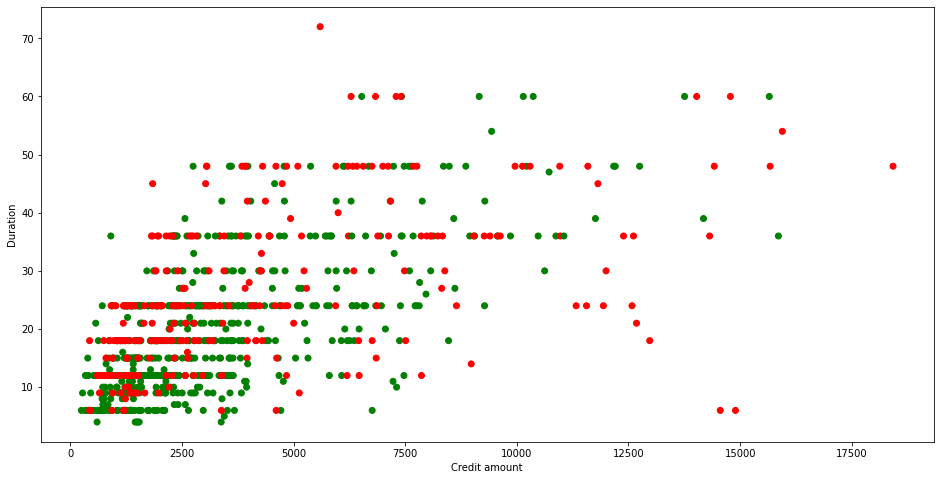

Кейсы с меньшей продолжительностью и меньшим размером кредита имеют больше положительных результатов. Негативные исходы больше наблюдаются на росте ‘credit amount’

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [25]:
import plotly.express as px
fig = px.scatter_3d(data, x='duration', y='amount', z='age',
              color='credit_risk', title='3Dscatter of the credit amount, age and duration')

fig.show()


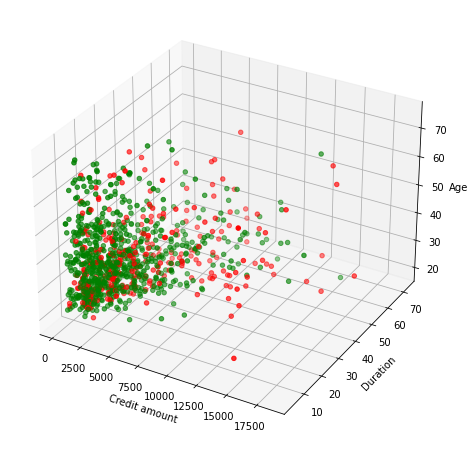

С помощью plotly изображен 3d график, который можно вертеть и увеличивать, также показано значение у каждого отдельного человека. Видна уплотнение в начале координат - та же тенденция описанная в начале комментария предыдущего задания.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [14]:
data2 = data.copy()

In [15]:
data2 = data2.drop(['purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans'], axis=1)

In [16]:
data2.loc[data2['credit_risk'] == 'good', 'credit_risk'] = 1
data2.loc[data2['credit_risk'] == 'bad', 'credit_risk'] = 0

data2.loc[data2['foreign_worker'] == 'no', 'foreign_worker'] = 1
data2.loc[data2['foreign_worker'] == 'yes', 'foreign_worker'] = 0

data2.loc[data2['telephone'] == 'no', 'telephone'] = 0
data2.loc[data2['telephone'] == 'yes (under customer name)', 'telephone'] = 1

data2.loc[data2['people_liable'] == '0 to 2', 'people_liable'] = 0
data2.loc[data2['people_liable'] == '3 or more', 'people_liable'] = 1

data2.loc[data2['job'] == 'unemployed/unskilled - non-resident', 'job'] = 0
data2.loc[data2['job'] == 'unskilled - resident', 'job'] = 1
data2.loc[data2['job'] == 'skilled employee/official', 'job'] = 2
data2.loc[data2['job'] == 'manager/self-empl./highly qualif. employee', 'job'] = 3

data2.loc[data2['number_credits'] == '>= 6', 'number_credits'] = 0
data2.loc[data2['number_credits'] == '4-5', 'number_credits'] = 1
data2.loc[data2['number_credits'] == '2-3', 'number_credits'] = 2
data2.loc[data2['number_credits'] == '1', 'number_credits'] = 3

data2.loc[data2['housing'] == 'for free', 'housing'] = 0
data2.loc[data2['housing'] == 'rent', 'housing'] = 1
data2.loc[data2['housing'] == 'own', 'housing'] = 2

data2.loc[data2['present_residence'] == '< 1 yr', 'present_residence'] = 0
data2.loc[data2['present_residence'] == '1 <= ... < 4 yrs', 'present_residence'] = 1
data2.loc[data2['present_residence'] == '4 <= ... < 7 yrs', 'present_residence'] = 2
data2.loc[data2['present_residence'] == '>= 7 yrs', 'present_residence'] = 3

data2.loc[data2['installment_rate'] == '>= 35', 'installment_rate'] = 0
data2.loc[data2['installment_rate'] == '25 <= ... < 35', 'installment_rate'] = 1
data2.loc[data2['installment_rate'] == '20 <= ... < 25', 'installment_rate'] = 2
data2.loc[data2['installment_rate'] == '< 20', 'installment_rate'] = 3

data2.loc[data2['employment_duration'] == 'unemployed', 'employment_duration'] = 0
data2.loc[data2['employment_duration'] == '< 1 yr', 'employment_duration'] = 1
data2.loc[data2['employment_duration'] == '1 <= ... < 4 yrs', 'employment_duration'] = 2
data2.loc[data2['employment_duration'] == '4 <= ... < 7 yrs', 'employment_duration'] = 3
data2.loc[data2['employment_duration'] == '>= 7 yrs', 'employment_duration'] = 4

dct = {'unknown/no savings account': 0, '... < 100 DM': 1, '100 <= ... < 500 DM': 2, '500 <= ... < 1000 DM': 3, '... >= 1000 DM': 4}
data2['savings'] = data2['savings'].map(dct)
data2.loc[data2['savings'] == 'unknown/no savings account', 'savings'] = 0
data2.loc[data2['savings'] == '... < 100 DM', 'savings'] = 1
data2.loc[data2['savings'] == '100 <= ... < 500 DM', 'savings'] = 2
data2.loc[data2['savings'] == '500 <= ... < 1000 DM', 'savings'] = 3
data2.loc[data2['savings'] == '... >= 1000 DM', 'savings'] = 4

data2.loc[data2['credit_history'] == 'critical account/other credits elsewhere', 'credit_history'] = 0
data2.loc[data2['credit_history'] == 'delay in paying off in the past', 'credit_history'] = 1
data2.loc[data2['credit_history'] == 'existing credits paid back duly till now', 'credit_history'] = 2
data2.loc[data2['credit_history'] == 'all credits at this bank paid back duly', 'credit_history'] = 3
data2.loc[data2['credit_history'] == 'no credits taken/all credits paid back duly', 'credit_history'] = 4

data2.loc[data2['status'] == 'no checking account', 'status'] = 1
data2.loc[data2['status'] == '... < 0 DM', 'status'] = 0
data2.loc[data2['status'] == '0<= ... < 200 DM', 'status'] = 2
data2.loc[data2['status'] == '... >= 200 DM / salary for at least 1 year', 'status'] = 3



In [17]:
data2

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,age,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,3,1049,0.0,1,3,3,21,0,3,2,0,0,1,1
1,1,9,3,2799,0.0,2,1,1,36,0,2,2,1,0,1,1
2,0,12,4,841,NaN,3,1,3,23,0,3,1,0,0,1,1
3,1,12,3,2122,0.0,2,2,1,39,0,2,1,1,0,0,1
4,1,12,3,2171,0.0,2,3,3,38,1,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,4,1987,0.0,2,1,3,21,0,3,1,1,0,1,0
996,1,24,4,2303,0.0,4,3,0,45,1,3,2,0,0,1,0
997,3,21,3,12680,4.0,4,3,3,30,2,3,3,0,1,1,0
998,0,12,4,6468,4.0,0,1,0,52,1,3,3,0,1,1,0


Возникли проблемы со столбцом ‘savings’, программа не видит две категории, пробовал метод loc, map и data[data[...] == ...] = ..., ничего не получилось.
Единственный способ который вижу заполнить пропуски значением 1.5 с помощью цикла.

In [20]:

for i in range(len(data2['savings'])):
  if data2['savings'][i] != 3 and data2['savings'][i] != 4 and data2['savings'][i] != 0:
    data2['savings'][i] = 1.5


<ipython-input-20-465fc4137ce9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['savings'][i] = 1.5


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [21]:
def predict(Xtest: np.array) -> np.array:
  results = []
  for i in Xtest:
    answer = i.dot(np.array([20, 0.5, 6, -0.01, 20, 4, 7, 10, 1, 3, 6, 3, 4, 0, 0]))
    if answer < med:
      results.append(0)
    else:
      results.append(1)

  return np.array(results)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data2.drop('credit_risk', 1).values
y = data2['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
answers = []
for i in range(len(X)):
  answers.append(X[i].dot(np.array([20, 0.5, 6, -0.01, 20, 4, 7, 10, 1, 3, 6, 3, 4, 0, 0])))
med = np.median(answers)
y_test = np.array(y_test, dtype = int)
y_train = np.array(y_train, dtype = int)
accuracy_score(y_test, predict(X_test))

<ipython-input-21-cbce39db7cda>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data2.drop('credit_risk', 1).values


0.616

Способ который решил использовать: разработать веса для каждого столбца, их подбирал во время обучения, далее с помощью этих весов посчитать 1000 значений из data2, затем взять медиану полученных значений (при подсчете учитывается закон - чем больше тем лучше). Дальше применяем такой простой алгоритм: если значение на тестовой выборке меньше медианы, означает что кредит не будет оплачен, иначе наоборот.